In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
day_2 = pd.read_csv("prices_round_3_day_2.csv", sep = ';')
day_1 = pd.read_csv("prices_round_3_day_1.csv", sep = ';')
day_0 = pd.read_csv("prices_round_3_day_0.csv", sep = ';')

In [4]:
day_1["timestamp"] += 1000000
day_2["timestamp"] += 2000000
all_prices = pd.concat([day_0, day_1, day_2])
all_prices = all_prices.set_index("timestamp")

In [5]:
chocolate_prices = all_prices[all_prices["product"] == "CHOCOLATE"]
strawb_prices = all_prices[all_prices["product"] == "STRAWBERRIES"]
roses_prices = all_prices[all_prices["product"] == "ROSES"]
gift_prices = all_prices[all_prices["product"] == "GIFT_BASKET"]
gift_prices["spread"] = gift_prices["ask_price_1"] - gift_prices["bid_price_1"]

components_price = chocolate_prices["mid_price"]*4 + strawb_prices["mid_price"]*6 + roses_prices["mid_price"]

C:\Users\edgar\AppData\Local\Temp\ipykernel_5656\2526908717.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gift_prices["spread"] = gift_prices["ask_price_1"] - gift_prices["bid_price_1"]


In [6]:
choc_comp_price = chocolate_prices["mid_price"]*4
strawb_comp_price = strawb_prices["mid_price"]*6
rose_comp_price = roses_prices["mid_price"]

In [7]:
comps = pd.concat([choc_comp_price, strawb_comp_price, rose_comp_price, components_price], axis = 1)
comps.columns = ["CHOC", "STRAWB", "ROSE", "COMP"]
#comps["CHOC_W"] = comps["COMP"] / comps["CHOC"]
#comps["STRAWB_W"] = comps["COMP"] / comps["STRAWB"]
#comps["ROSE_W"] = comps["COMP"] / comps["ROSE"]
comps

,CHOC,STRAWB,ROSE,COMP
timestamp,,,,
0,32000.0,24000.0,15000.0,71000.0
100,32006.0,23997.0,15000.0,71003.0
200,32004.0,23997.0,15000.5,71001.5
300,32010.0,23997.0,15000.0,71007.0
400,32008.0,23997.0,14997.5,71002.5
...,...,...,...,...
2999500,31002.0,23901.0,14409.5,69312.5
2999600,31002.0,23901.0,14408.0,69311.0
2999700,31002.0,23907.0,14411.5,69320.5


In [8]:
comps.mean(axis=0)

CHOC      31661.38900
STRAWB    24161.02410
ROSE      14506.89705
COMP      70329.31015
dtype: float64

Text(0.5, 1.0, 'GIFTS vs COMPONENTS')

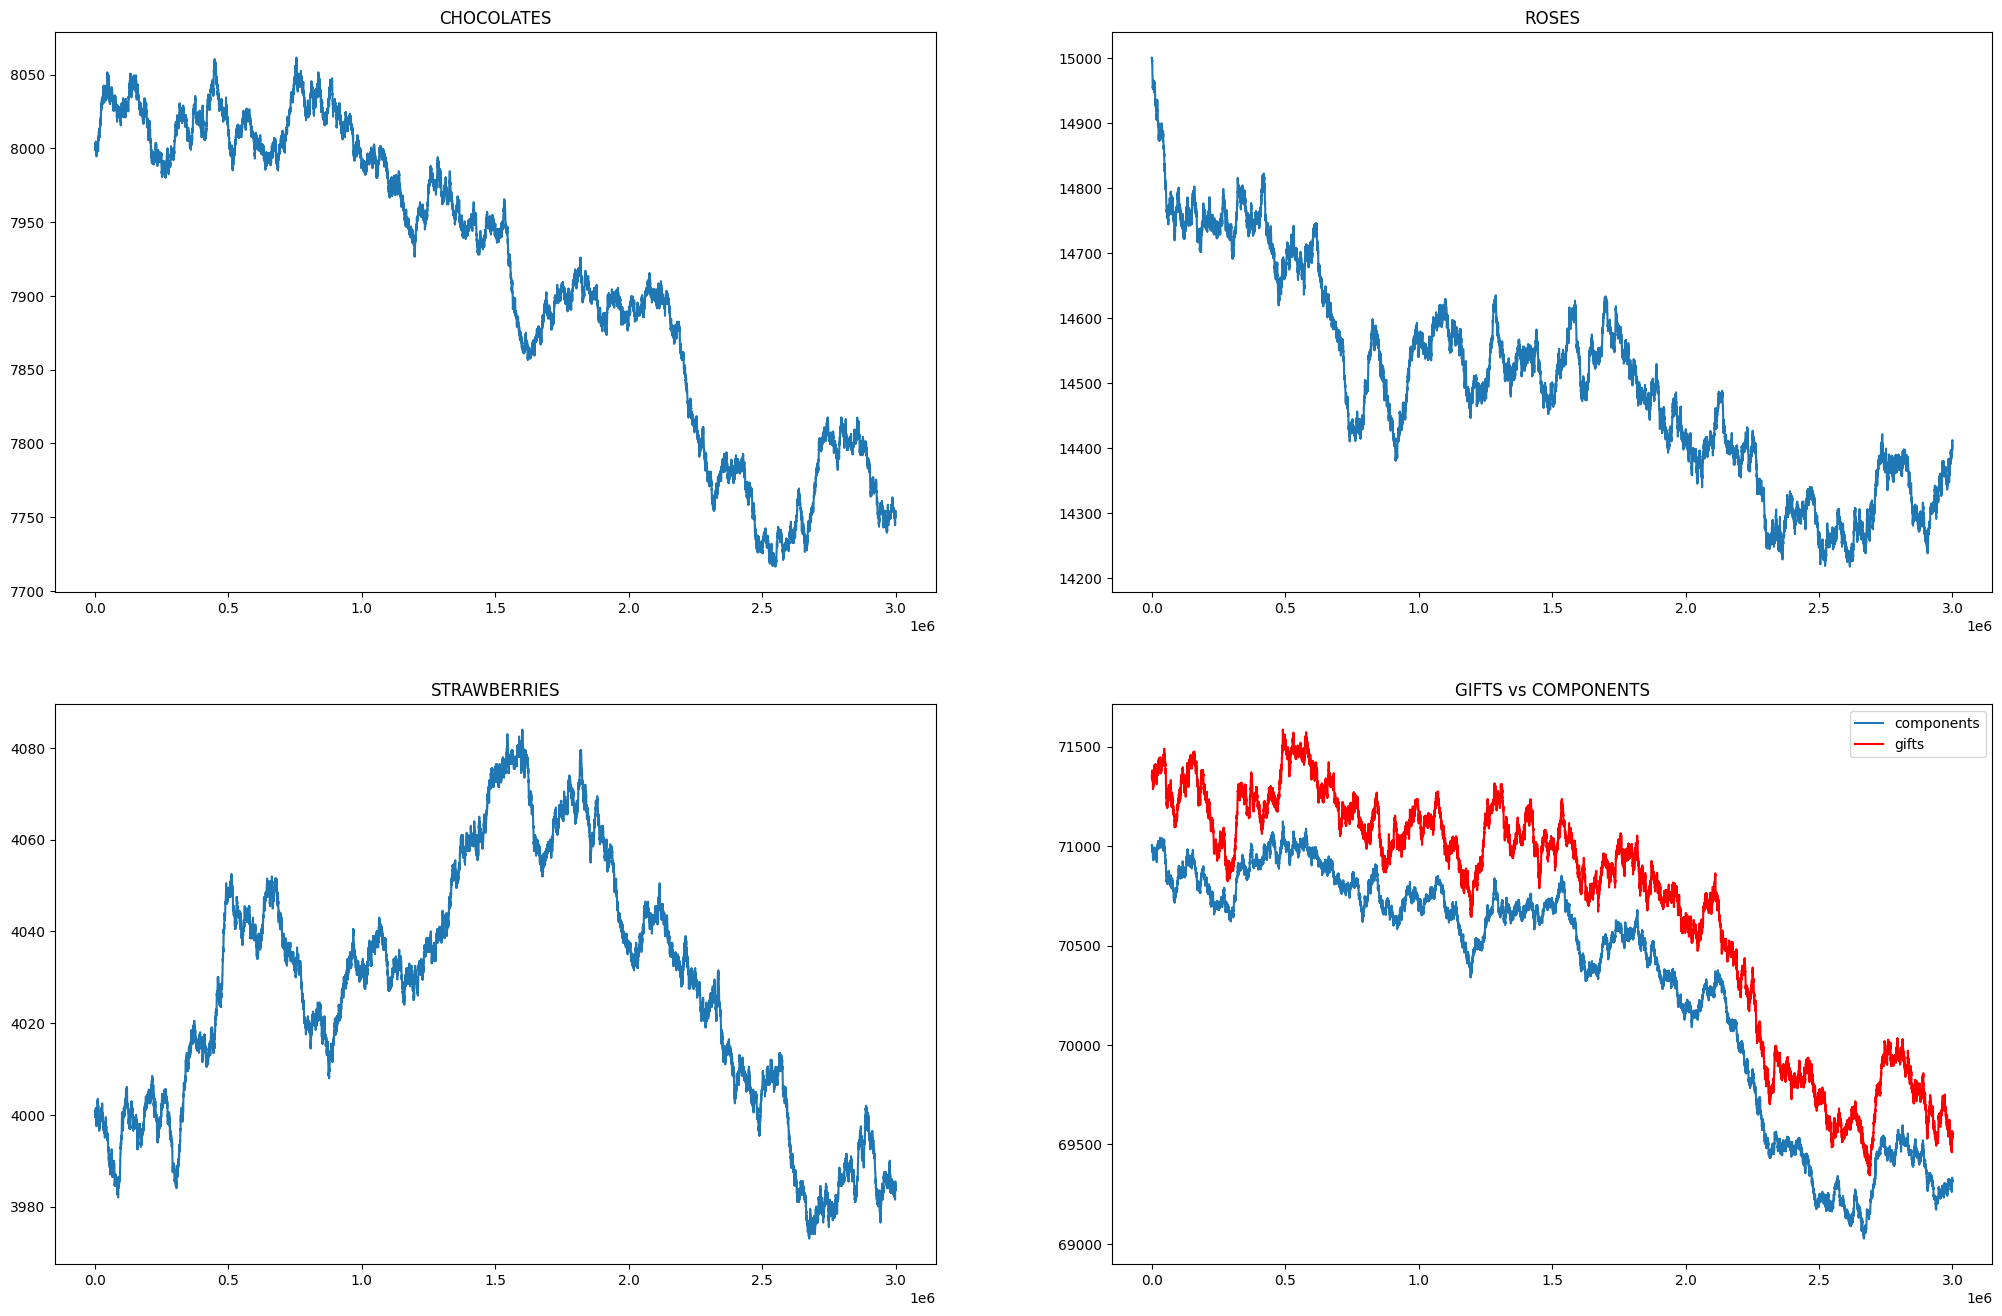

In [9]:
fig, ax = plt.subplots(2, 2, figsize = (25, 16))
ax[0, 0].plot(chocolate_prices["mid_price"])
ax[0, 0].set_title("CHOCOLATES")
ax[0, 1].plot(roses_prices["mid_price"])
ax[0, 1].set_title("ROSES")
ax[1, 0].plot(strawb_prices["mid_price"])
ax[1, 0].set_title("STRAWBERRIES")
ax[1, 1].plot(components_price, label = "components")
ax[1, 1].plot(gift_prices["mid_price"], c = "r", label = "gifts")
ax[1, 1].legend()
ax[1, 1].set_title("GIFTS vs COMPONENTS")

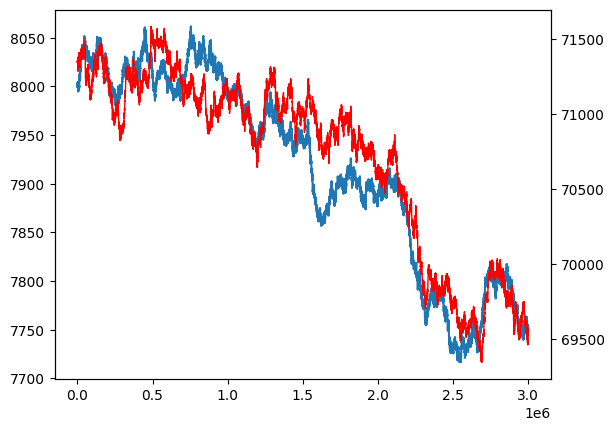

In [10]:
fig, ax1 = plt.subplots()
ax1.plot(chocolate_prices["mid_price"])

ax2 = ax1.twinx()

ax2.plot(gift_prices["mid_price"], c="r", lw = 1)

In [11]:
premium = gift_prices["mid_price"] - components_price

In [12]:
fair_premium = [premium.mean()] * len(premium) + (gift_prices["spread"])

UPPER BOUND:  398.5965788767708
LOWER BOUND:  360.3843877898958
MEAN:  379.4904833333333


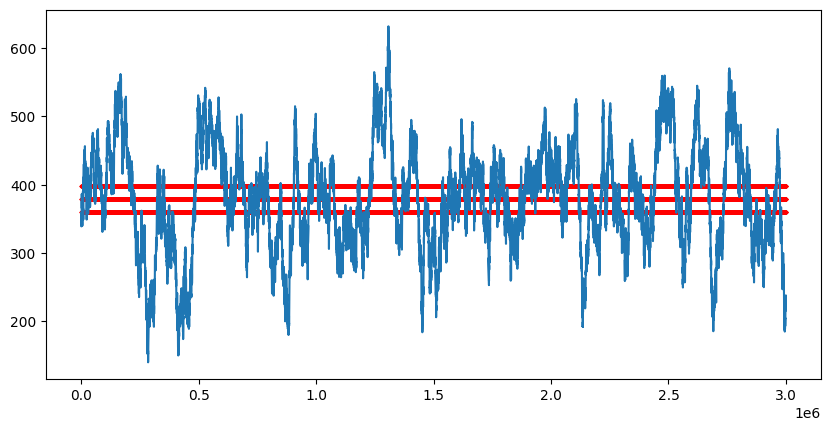

In [13]:
fig = plt.figure(figsize = (10, 4.8))
plt.plot(premium)
plt.scatter(premium.index, [premium.mean()] * len(premium), c = "r", s = 2)
plt.scatter(premium.index, [premium.mean() + premium.std() * .25] * len(premium), c = "r", s = 2)
plt.scatter(premium.index, [premium.mean() - premium.std() * .25] * len(premium), c = "r", s = 2)


print("UPPER BOUND: ", premium.mean() + premium.std() * .25)
print("LOWER BOUND: ", premium.mean() - premium.std() * .25)
print("MEAN: ", premium.mean())

In [14]:
## COINTEGRAION

In [15]:
from statsmodels.tsa.stattools import coint

In [16]:
print("COINT OF CHOC WITH GIFTS: ", coint(chocolate_prices["mid_price"].values, gift_prices["mid_price"].values))

print("COINT OF STRAWB WITH GIFTS:",coint(strawb_prices["mid_price"].values, gift_prices["mid_price"].values))

print("COINT OF ROSES WITH GIFTS: ", coint(roses_prices["mid_price"].values, gift_prices["mid_price"].values))

print("COINT OF ROSES WITH PREMIUM: ", coint(roses_prices["mid_price"].values, premium.values))

print("COINT OF CHOCS WITH PREMIUM: ", coint(chocolate_prices["mid_price"].values, premium.values))

print("COINT OF STRAWBS WITH PREMIUM: ", coint(strawb_prices["mid_price"].values, premium.values))

COINT OF CHOC WITH GIFTS:  (-3.1435866460011046, 0.07987947236885151, array([-3.89680511, -3.33633368, -3.04459138]))
COINT OF STRAWB WITH GIFTS: (-1.8374678137785858, 0.6113506142097073, array([-3.89680511, -3.33633368, -3.04459138]))
COINT OF ROSES WITH GIFTS:  (-3.891473388454101, 0.010191378268671161, array([-3.89680511, -3.33633368, -3.04459138]))
COINT OF ROSES WITH PREMIUM:  (-2.9663944431903264, 0.11841119323841948, array([-3.89680511, -3.33633368, -3.04459138]))
COINT OF CHOCS WITH PREMIUM:  (-0.4445231458389062, 0.9680547052797669, array([-3.89680511, -3.33633368, -3.04459138]))
COINT OF STRAWBS WITH PREMIUM:  (-0.9627113118808303, 0.909694162201765, array([-3.89680511, -3.33633368, -3.04459138]))


In [17]:
premium_h = gift_prices["mid_price"][(premium > 475)]
premium_l = gift_prices["mid_price"][(premium < 284)]
liquidate = gift_prices["mid_price"][(premium > 379) & (premium < 381)]

choc_h = chocolate_prices["mid_price"][(premium > 494)]
choc_l = chocolate_prices["mid_price"][(premium < 265)]
liquidate_c = chocolate_prices["mid_price"][(premium > 379) & (premium < 381)]

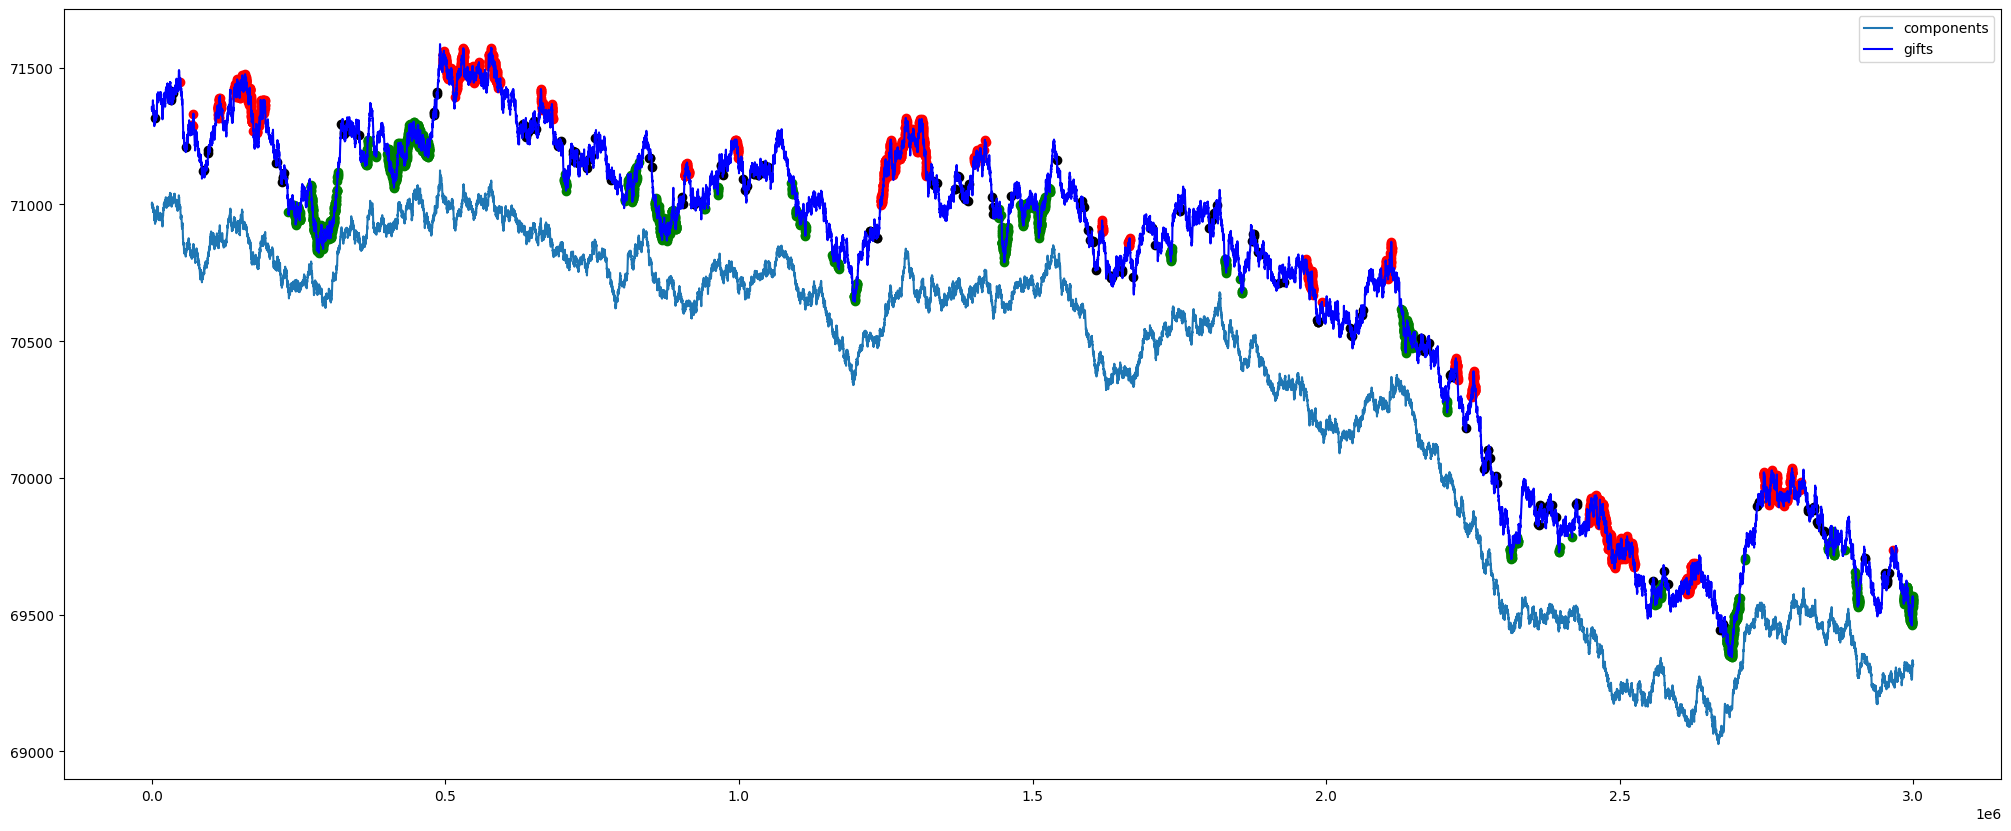

In [18]:
fig = plt.figure(figsize=(25, 10))
plt.plot(components_price, label = "components")
plt.plot(gift_prices["mid_price"], c = "b", label = "gifts")
plt.scatter(premium_h.index, premium_h.values, c = "r")
plt.scatter(premium_l.index, premium_l.values, c = "g")
plt.scatter(liquidate.index, liquidate.values, c = "black")
plt.legend()

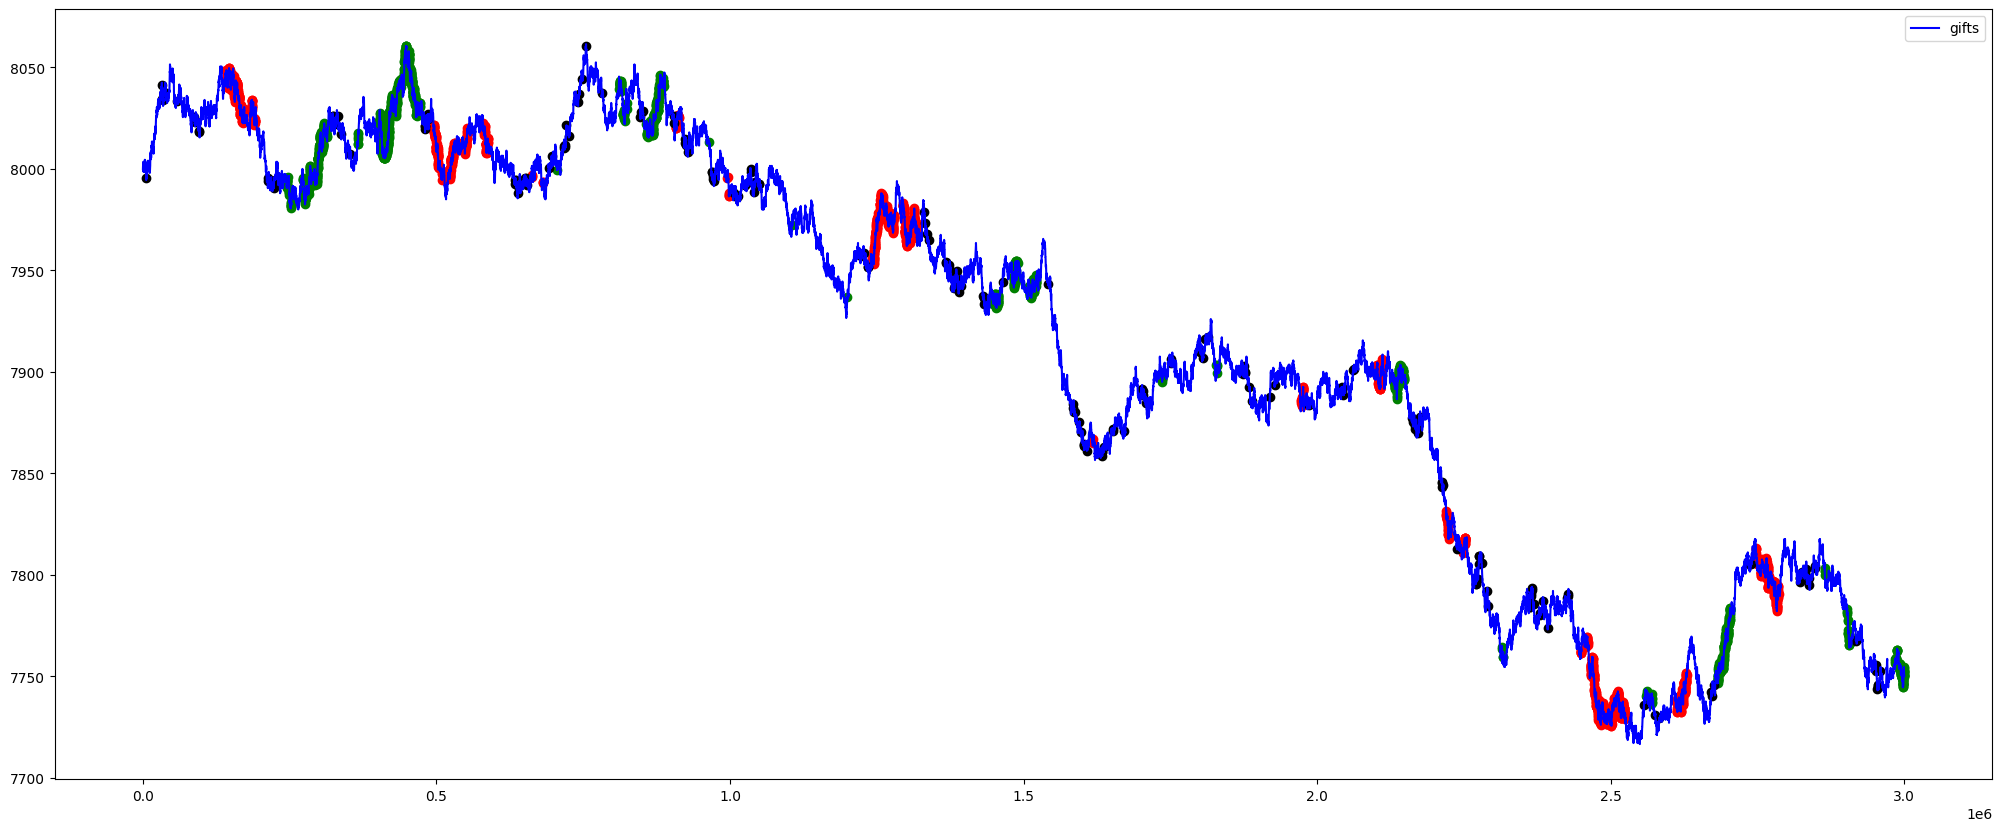

In [19]:
fig = plt.figure(figsize=(25, 10))
plt.plot(chocolate_prices["mid_price"], c = "b", label = "gifts")
plt.scatter(choc_h.index, choc_h.values, c = "r")
plt.scatter(choc_l.index, choc_l.values, c = "g")
plt.scatter(liquidate_c.index, liquidate_c.values, c = "black")
plt.legend()

In [20]:
choc_w = gift_prices["mid_price"] / chocolate_prices["mid_price"]

In [21]:
strawb_w = gift_prices["mid_price"] / strawb_prices["mid_price"]

In [22]:
roses_w = gift_prices["mid_price"] / roses_prices["mid_price"]

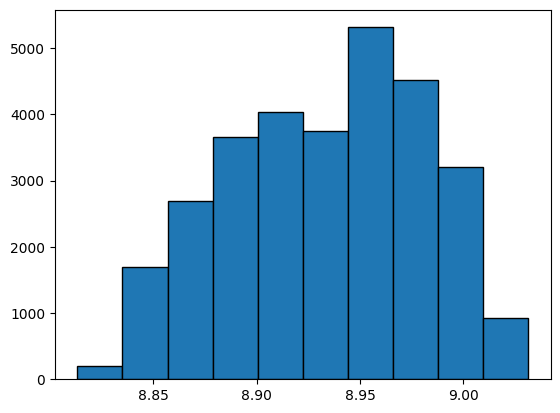

In [29]:
result_choc = plt.hist(choc_w.values, bins = 10, histtype = "bar", ec = "black")

In [28]:
print(result_choc[1])

[8.81339713 8.82792982 8.84246251 8.85699521 8.8715279  8.88606059
 8.90059329 8.91512598 8.92965867 8.94419137 8.95872406 8.97325675
 8.98778944 9.00232214 9.01685483 9.03138752]


[17.30912477 17.36825737 17.42738997 17.48652257 17.54565518 17.60478778
 17.66392038 17.72305298 17.78218558 17.84131819 17.90045079]


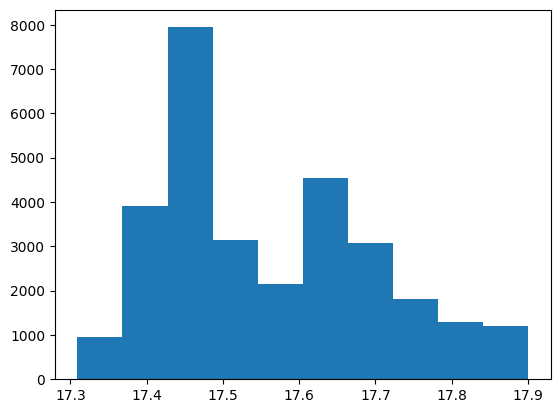

In [24]:
result_strawb = plt.hist(strawb_w.values)
print(result_strawb[1])

[4.75630812 4.77513508 4.79396204 4.812789   4.83161596 4.85044292
 4.86926989 4.88809685 4.90692381 4.92575077 4.94457773]


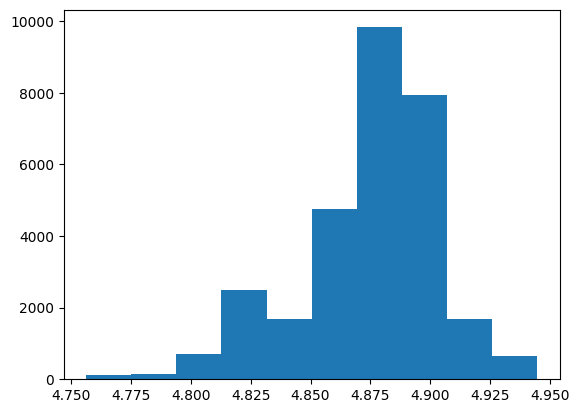

In [25]:
result_roses = plt.hist(roses_w.values)
print(result_roses[1])

379.4904833333333
[140.  189.2 238.4 287.6 336.8 386.  435.2 484.4 533.6 582.8 632. ]


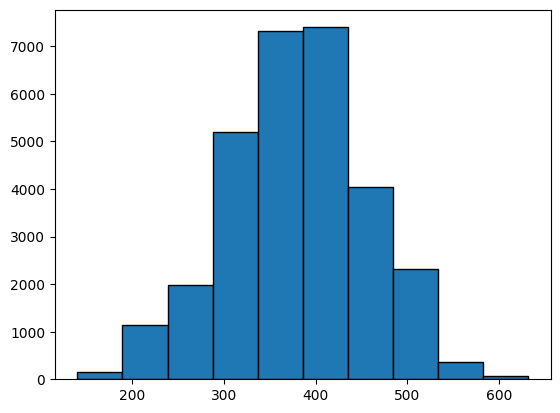

In [98]:
result_premium = plt.hist(premium.values, bins=10, histtype="bar", ec = "black")
print(premium.values.mean())
print(result_premium[1])

In [33]:
gift_comp = gift_prices["mid_price"] / comps["COMP"]
gift_comp.std()

0.001090926327612815

In [49]:
chocolate_prices = day_2[day_2["product"] == "CHOCOLATE"]
strawb_prices = day_2[day_2["product"] == "STRAWBERRIES"]
roses_prices = day_2[day_2["product"] == "ROSES"]
gift_prices = day_2[day_2["product"] == "GIFT_BASKET"]


roses_w_2 = gift_prices["mid_price"].values / roses_prices["mid_price"].values
roses_w_2


array([4.89536456, 4.89590266, 4.89630785, ..., 4.82552129, 4.82511709,
       4.82642334])

[4.82511709 4.83479157 4.84446605 4.85414054 4.86381502 4.87348951
 4.88316399 4.89283847 4.90251296 4.91218744 4.92186192]


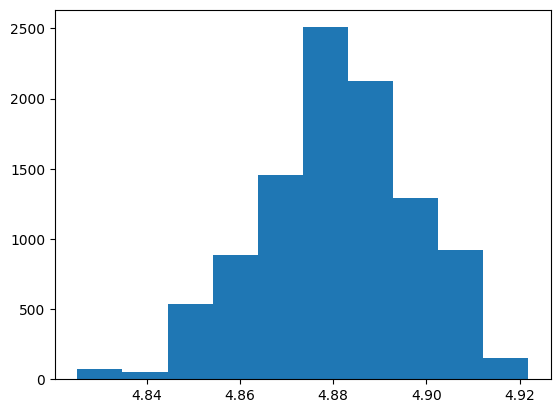

In [51]:
result_roses = plt.hist(roses_w_2)
print(result_roses[1])

In [17]:
means = comps.mean()

In [18]:
means

CHOC      31661.38900
STRAWB    24161.02410
ROSE      14506.89705
COMP      70329.31015
dtype: float64

In [13]:
weights = pd.DataFrame([gift_prices["mid_price"] / chocolate_prices["mid_price"], gift_prices["mid_price"] / strawb_prices["mid_price"], gift_prices["mid_price"] / roses_prices["mid_price"]], columns=["CHOC", "STRAWB", "ROSES"])

In [14]:
weights

,CHOC,STRAWB,ROSES
mid_price,NaN,NaN,NaN
mid_price,NaN,NaN,NaN
mid_price,NaN,NaN,NaN


In [23]:
choc_w = (gift_prices["mid_price"] / comps["CHOC"])
print(choc_w.std())

0.011753874272915216


In [28]:
ratio = gift_prices["mid_price"] / (chocolate_prices["mid_price"] + strawb_prices["mid_price"] + roses_prices["mid_price"])

In [29]:
ratio

timestamp
0          2.642778
100        2.642476
200        2.642384
300        2.642415
400        2.642376
             ...   
2999500    2.659724
2999600    2.659686
2999700    2.659744
2999800    2.659655
2999900    2.660292
Name: mid_price, Length: 30000, dtype: float64

In [30]:
ratio.mean()

2.6734350394069883

In [31]:
ratio.std()

0.007989431193445981

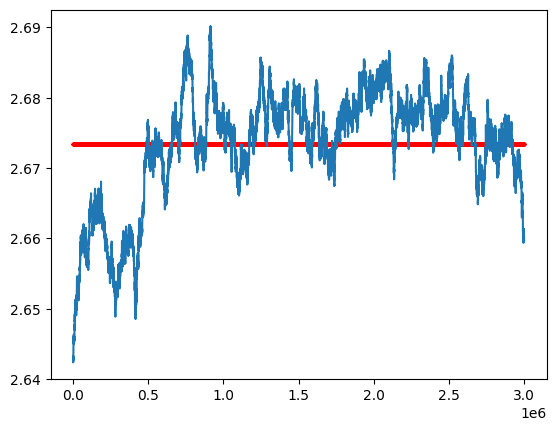

In [36]:
plt.plot(ratio)
plt.scatter(ratio.index, [ratio.mean()] * len(ratio), c = "r", s = 2)

In [43]:
dat = pd.concat([comps["CHOC"], comps["STRAWB"], gift_prices["mid_price"], comps["ROSE"].shift()], axis = 1).dropna()

In [76]:
train = dat.iloc[:19999]
test = dat.iloc[-10000:-1]
test

,CHOC,STRAWB,mid_price,ROSE
timestamp,,,,
2000000,31556.0,24219.0,70598.5,14422.5
2000100,31558.0,24219.0,70618.5,14421.5
2000200,31562.0,24222.0,70617.0,14424.0
2000300,31560.0,24222.0,70615.5,14422.5
2000400,31560.0,24222.0,70629.5,14421.5
...,...,...,...,...
2999400,31010.0,23904.0,69548.5,14399.5
2999500,31002.0,23901.0,69534.5,14405.5
2999600,31002.0,23901.0,69529.5,14409.5


In [92]:
train

,CHOC,STRAWB,mid_price,ROSE
timestamp,,,,
100,32006.0,23997.0,71349.5,15000.0
200,32004.0,23997.0,71347.0,15000.0
300,32010.0,23997.0,71350.5,15000.5
400,32008.0,23997.0,71341.5,15000.0
500,32006.0,23997.0,71343.5,14997.5
...,...,...,...,...
1999500,31532.0,24219.0,70589.5,14422.0
1999600,31542.0,24219.0,70599.5,14421.0
1999700,31542.0,24213.0,70585.5,14418.0


In [77]:
y = comps["ROSE"].shift(-1)
y_train = y.iloc[:19999]
y_test = y.iloc[-10000:].dropna()
y_test

timestamp
2000000    14424.0
2000100    14422.5
2000200    14421.5
2000300    14422.0
2000400    14422.5
            ...   
2999400    14409.5
2999500    14408.0
2999600    14411.5
2999700    14412.5
2999800    14411.5
Name: ROSE, Length: 9999, dtype: float64

In [93]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import r2_score

reg = Ridge()
reg.fit(train, y_train)

Ridge()

In [88]:
preds = pd.Series(reg.predict(test), index = y_test.index)
preds

timestamp
2000000    14422.605328
2000100    14421.633894
2000200    14424.115684
2000300    14422.619543
2000400    14421.642099
               ...     
2999400    14399.401862
2999500    14405.384083
2999600    14409.367933
2999700    14407.880741
2999800    14411.374217
Length: 9999, dtype: float64

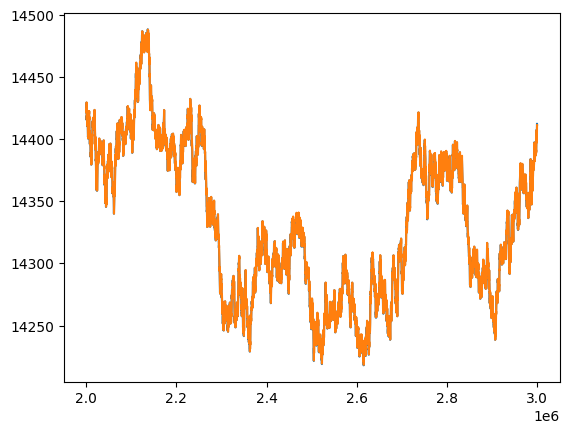

In [89]:
plt.plot(y_test)
plt.plot(preds)

In [90]:
r2_score(preds, y_test)

0.9959872292844597

<Axes: >

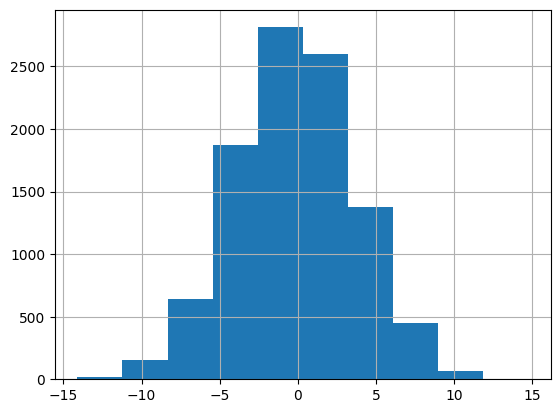

In [91]:
(y_test - preds).hist()